http://exo7.emath.fr/cours/livre-python1.pdf page 143

https://github.com/exo7math/python1-exo7/blob/master/vie/vie.pdf


**Le Jeu De La Vie**

    Le jeu de la vie est un modèle simple de l’évolution d’une population de cellules qui naissent et
    meurent au cours du temps. Le « jeu » consiste à trouver des configurations initiales qui donnent des
    évolutions intéressantes : certains groupes de cellules disparaissent, d’autres se stabilisent, certains se
    déplacent. . .


**Presente** = 1, ROUGE

**Absente** = 0, BLANC

   **ACTIVITE 1**
   
Objectifs : définir et afficher des tableaux indexés par deux indices.


In [6]:
tableau = np.ones(shape = (3,4))*11
tableau[0][0] = 0
# tab[0][1] = 0
# tab[2][1] = 0
print(tableau)


[[  0.  11.  11.  11.]
 [ 11.  11.  11.  11.]
 [ 11.  11.  11.  11.]]


**ACTIVITE 2**

Objectifs : réaliser l’affichage graphique d’une configuration de cellules

Tableau réalisé au hasard

tab [[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
shape (5, 5)


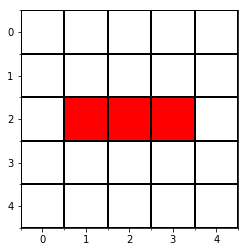

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# VARIABLES GLOBALES (on verra plus tard comment s'en passer)
PRESENTE = 1
ABSENTE = 0


tab = np.zeros(shape = (5,5))
tab[2,1] = 1
tab[2,2] = 1
tab[2,3] = 1

print('tab', tab)
print('shape', tab.shape)


def affichage_cells(tab):
    
    n, p = tab.shape
    
    im = plt.imshow(tab,
                    cmap=colors.ListedColormap(['white','red']));
    ax = plt.gca();

    # Major ticks
    ax.set_xticks(np.arange(0, p, 1));
    ax.set_yticks(np.arange(0, n, 1));

    # Minor ticks
    ax.set_xticks(np.arange(-.5, p, 1), minor=True);
    ax.set_yticks(np.arange(-.5, n, 1), minor=True);
    
    # Gridlines based on minor ticks
    ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
    
    
affichage_cells(tab)

Tableau réalisé sans hasard

**ACTIVITE 3**

Objectifs : calculer l’évolution d’une configuration au jour d’après

In [8]:
def nombre_voisins(i,j,tab):
    compteur = 0
    n,p = tab.shape
    
    if i-1 >-1 and j-1> -1:
        if tab[i-1,j-1] == PRESENTE:
            compteur +=1
    if i-1 >-1:
        if tab[i-1,j] == PRESENTE:
            compteur += 1
    if i-1 > -1 and j+1 < p:
        if tab[i-1,j+1] == PRESENTE:
            compteur += 1
    if j-1 > -1:
        if tab[i,j-1] == PRESENTE:
            compteur += 1
    if j+1 < p:
        if tab[i,j+1] == PRESENTE:
            compteur += 1
    if i+1 < n and j-1>-1:
        if tab[i+1,j-1] == PRESENTE:
            compteur += 1
    if i+1 < n:
        if tab[i+1,j] == PRESENTE:
            compteur += 1
    if i+1 < n and j+1 < p:
        if tab[i+1,j+1] == PRESENTE:
            compteur += 1
            
    return compteur

print(nombre_voisins(0,1,tab))

0


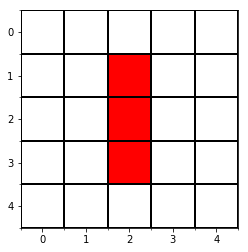

In [9]:
def evolution_un_jour(tab):
   
    n, p = tab.shape
    new_tab = np.zeros(shape = (n,p))

    for i in range (n):
        for j in range(p):
            if tab[i,j] == ABSENTE:
                if nombre_voisins(i,j,tab) == 3:
                    new_tab[i][j] = PRESENTE  # case vide et exacement trois voisins -> une naissance
            else:
                if nombre_voisins(i,j,tab) <= 1 or nombre_voisins(i,j,tab) >= 4:
                    new_tab[i][j] = ABSENTE
                else:
                    new_tab[i][j] = PRESENTE
                    # cellule entourée de 2 ou trois voisines: continue de vivre; sinon meurt
    return new_tab


def evolution(tab, jours):
    for _ in range(jours):
        tab = evolution_un_jour(tab)
    return tab

jours = 3
# affichage_cells(tab_une_cellule)
# affichage_cells(tab_cligno)
# affichage_cells(evolution_pierre(tab_une_cellule, jours)) # fonctionne
affichage_cells(evolution(tab, jours))



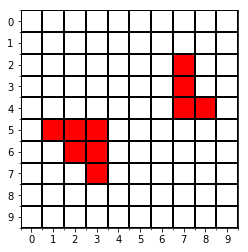

In [10]:
tableau = np.zeros(shape = (10,10))
tableau[2,1] = 1
tableau[2,2] = 1
tableau[2,3] = 1
tableau[4] = 1
tableau[5,7] = tableau[8,8] = 1

affichage_cells(evolution(tableau,jours))

Combien de jours ? : 3
pressez la touche espace pour continuer
>  
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
pressez la touche espace pour continuer
>  
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
pressez la touche espace pour continuer
>  
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


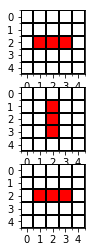

In [20]:
def affichage_multiple(tabs):
    m = len(tabs)
    for i in range(m):
        plt.subplot(m, 1, i+1)     # attention pour subplot: l'indiçage commence à 1
        affichage_cells(tabs[i])
        
jours = int(input("Combien de jours ? : "))
tabs = []
for i in range(jours):
    print("pressez la touche espace pour continuer")
    choice = input("> ")
    if choice == ' ' :
        print(evolution(tab,i))
        tabs.append(evolution(tab,i))
affichage_multiple(tabs)
    